# Proyecto Final UD2
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

En este proyecto, los alumnos del módulo de Machine Learning deberán demostrar los conocimientos adquiridos durante la UD2 y aplicar al menos dos algoritmos diferentes de aprendizaje supervisado vistos en clase (KNN, Regresión Lineal, Regresión Logística, Árboles de Decisión (o Randm Forest), SVM).

Para ello, tomaremos como referencia el dataset credit_train.csv y credit_test.csv que contienen la información sobre una campaña de márketing llevada a cabo mediante llamadas teléfonicas para captar clientes que quieran acceder a un crédito.

**Features o Input variables:**

1 - age: edad numérica

2 - job : tipo de trabajo (puede tomar los valores: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : estado civil (puede tomar los valores: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education : nivel de estudios (puede tomar los valores: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: ya tiene un crédito solicitado por defecto? (puede tomar los valores: 'no','yes','unknown')

6 - housing: tiene hipoteca? (puede tomar los valores: 'no','yes','unknown')

7 - loan: tiene una cuenta personal? (puede tomar los valores: 'no','yes','unknown')

8 - contact: tipo de comunicación de contacto (puede tomar los valores: 'cellular','telephone')

9 - month: último mes de contacto (puede tomar los valores: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: último día de la semana en el que se le ha contactado (puede tomar los valores: 'mon','tue','wed','thu','fri')

11 - duration: duración del último contacto en segundos (numérico). Importante: este atributo afecta en gran medida a la salida ya que si duration es 0, entonces  la salida es 'no'

12 - campaign: número de veces que se le ha contactado durante la campaña a este cliente (numérico, incluye el último contacto)

13 - pdays: número de días que han pasado desde que el cliente fue contactado por última vez(numérico; 999 significa que no ha sido contactado anteriormente)

14 - previous: número de contactos anteriores a esta campaña a este cliente(numérico)

15 - poutcome: resultado de la última campaña de marketing (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numérico)

17 - cons.price.idx: IPC - indicador mensual (numérico)

18 - cons.conf.idx: índice de confianza de los consumidores - indicador mensual (numérico)

19 - euribor3m: euribor tasa 3 meses - indicador diario (numérico)

20 - nr.employed: número de trabajadores - indicador en porciones  (numérico)

**Output variable (desired target):**

21 - y: Suscripción al crédito por parte del cliente? (binary: 'yes','no')

Los requisitos mínimos de este proyecto consisten en:

* Etapas comunes 1, 2 y 3 de importación, análisis numérico y visual, así como preprocesado.
* Para cada algoritmo que apliques deberás de mantener la siguiente estructura de 5 etapas (del 4-8), pero puedes añadir subapartados o etapas adicionales.
* En cada etapa se deben añadir explicaciones justificativas de lo que se quiere hacer, así como de los resultados obtenidos.
* Como resultado final, se deben contrastar los resultados obtenidos y comparar los algoritmos utilizados indicando claramente cual y porqué obtiene mejor resultados.

Cualificaciones:
- Uso de 2 algoritmos: cualificación máxima de 7 puntos
- Uso de 3 algoritmos: cualificación máxima de 10 puntos.




## 1. Importación de paquetes y dataset

In [ ]:
# Importación del df
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv('credit-train.csv', index_col=False)

# Importamos también el csv del 'credit-test.csv' en el cuál tenemos datos para crear las predicciones de los algoritmos
df_test = pd.read_csv('credit-test.csv', index_col=False)

# Importamos esta librería porque a la hora de hacer las predicciones en el algoritmo de KNN se queja del nombre de una de las columnas
import warnings
warnings.filterwarnings("ignore")

# Importación de librerías necesarias (Algoritmos KNN, Regresión Lineal Múltiple, Regresión Logística)
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

## 2.EDA y Visual EDA

In [ ]:
# Visualización preliminar de los datos. Mostramos las primeras 10 filas del dataframe.
df_train.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [ ]:
# Comprobamos la información del dataframe cargado.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
# Visualizamos los parámetros estadísticos de cada columna del dataframe:
# - Número de datos
# - Media
# - Desviación estándar
# - Valor mínimo
# - Percentiles
# - Valor máximo

df_train.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


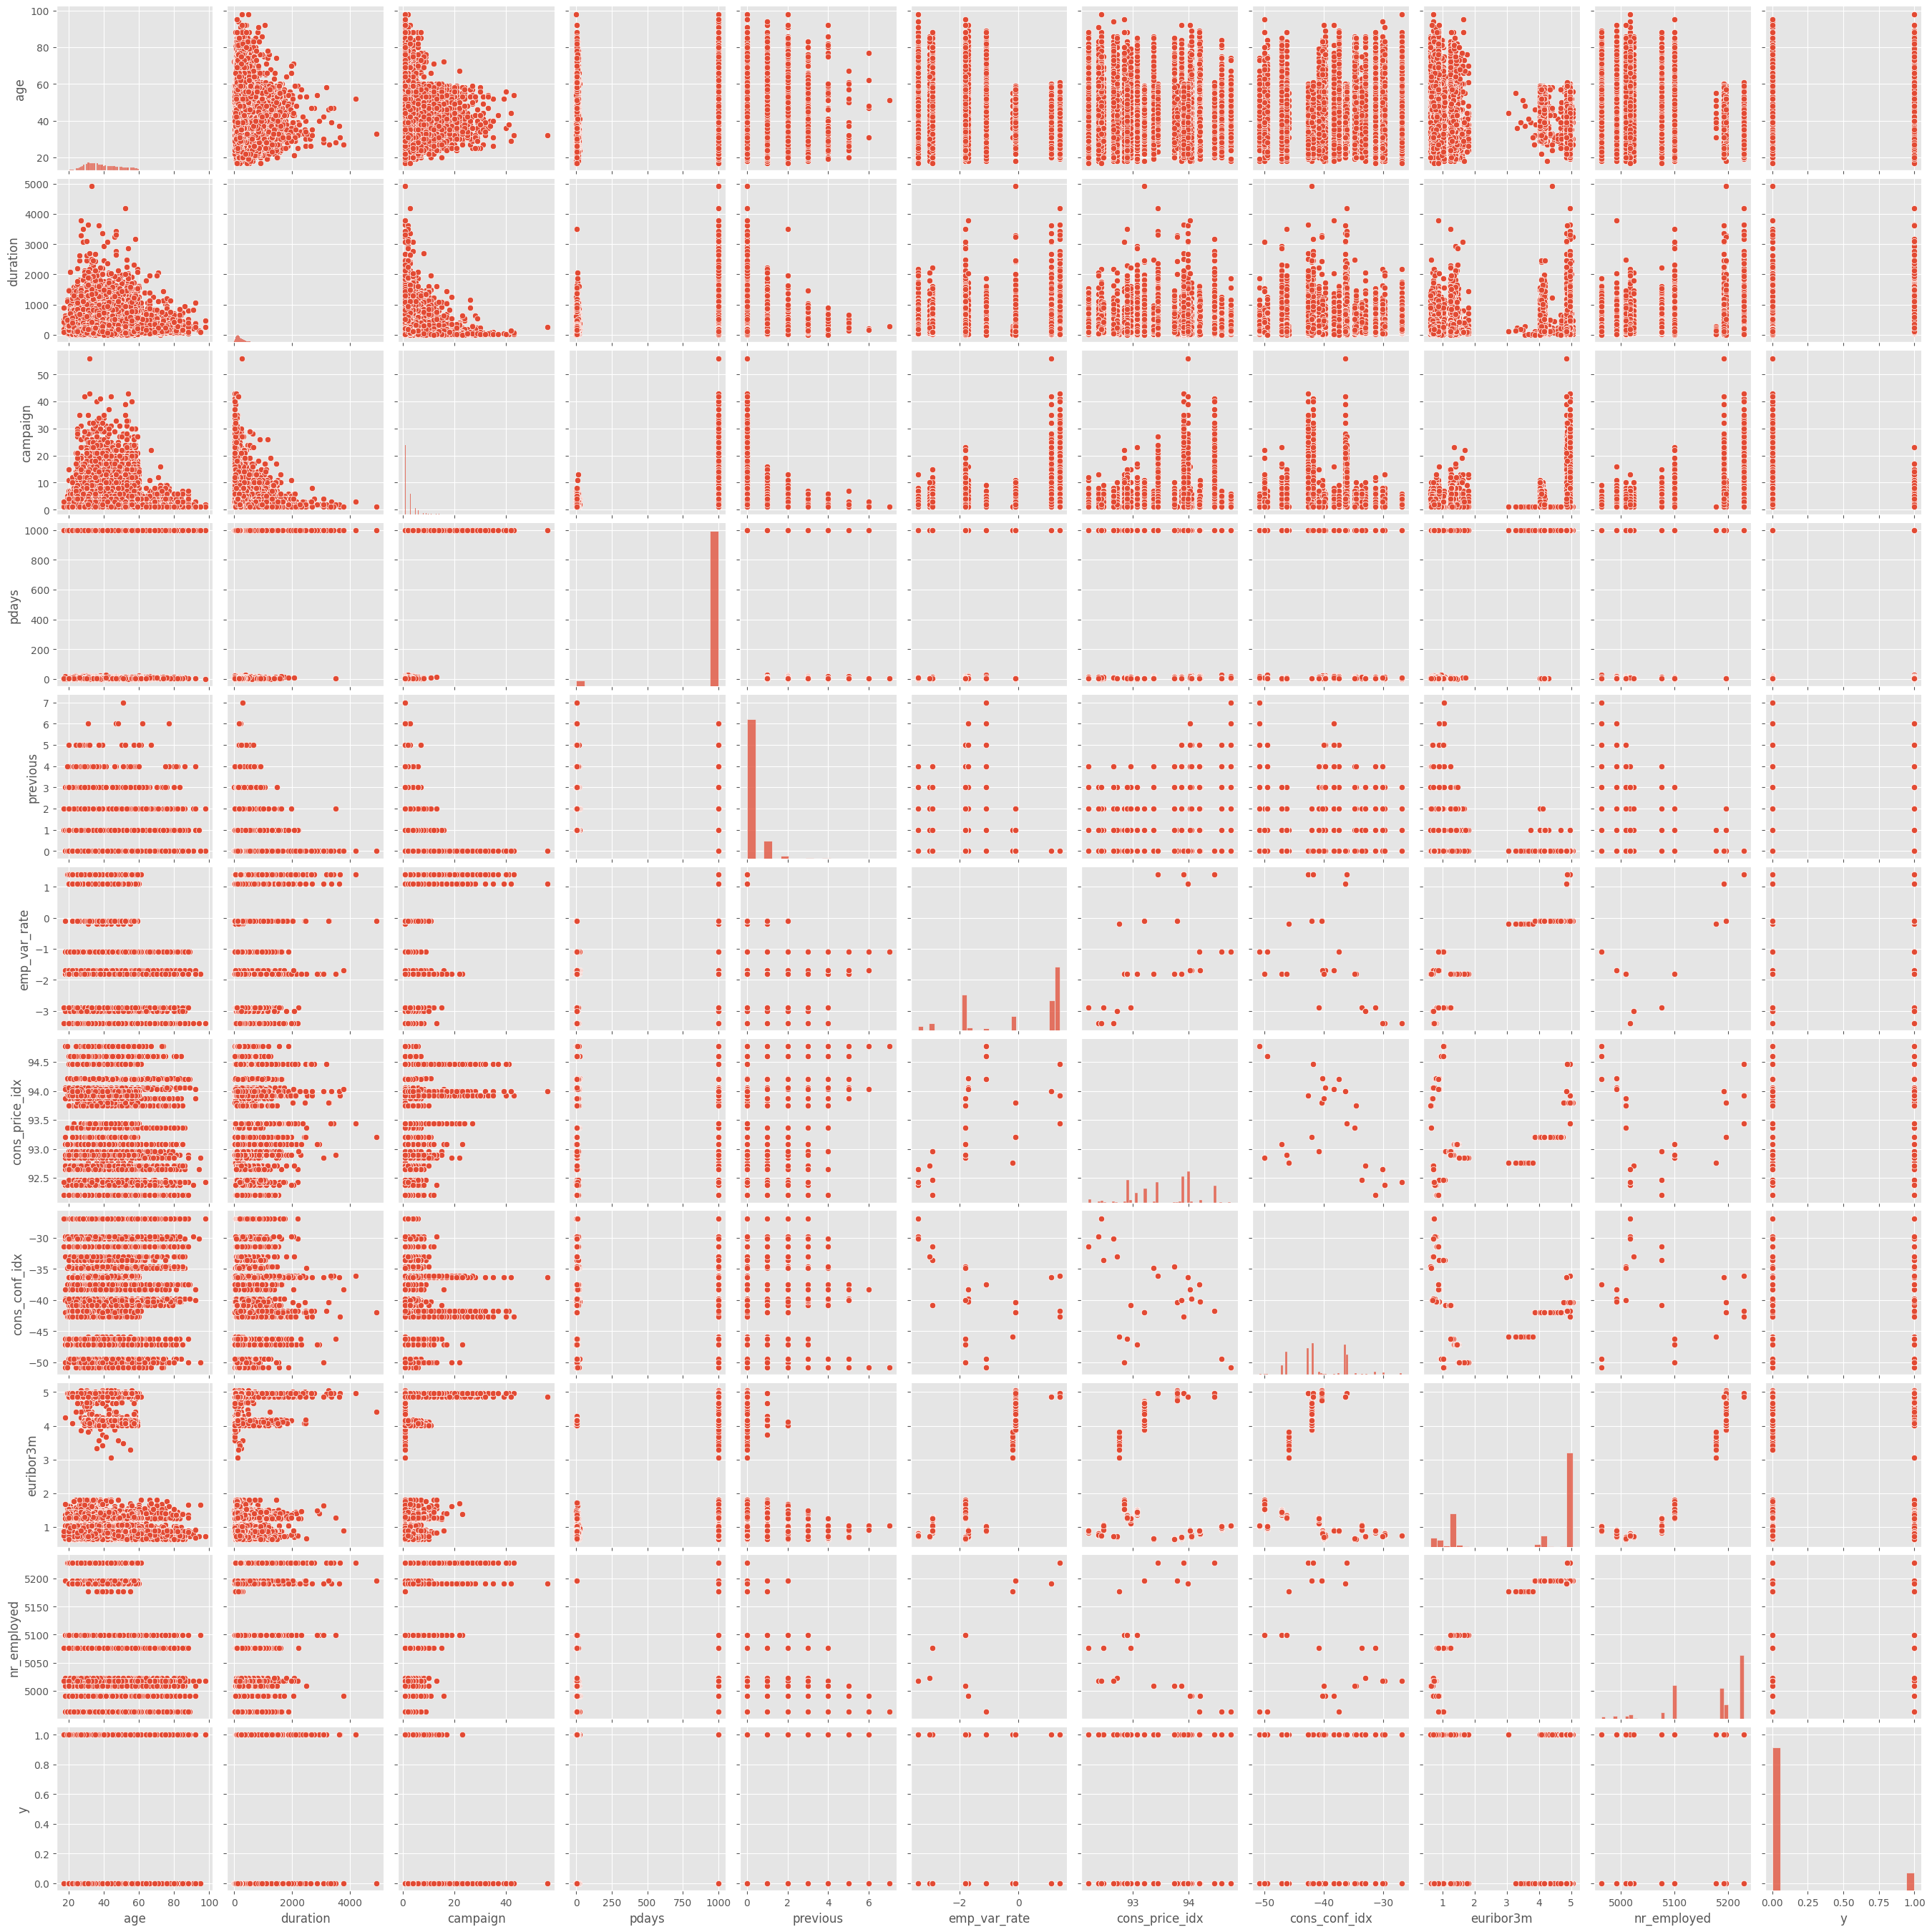

In [ ]:
# Mostramos gráficamente las relaciones entre las columnas numéricas.
sb.pairplot(df_train)

<Axes: ylabel='Frequency'>

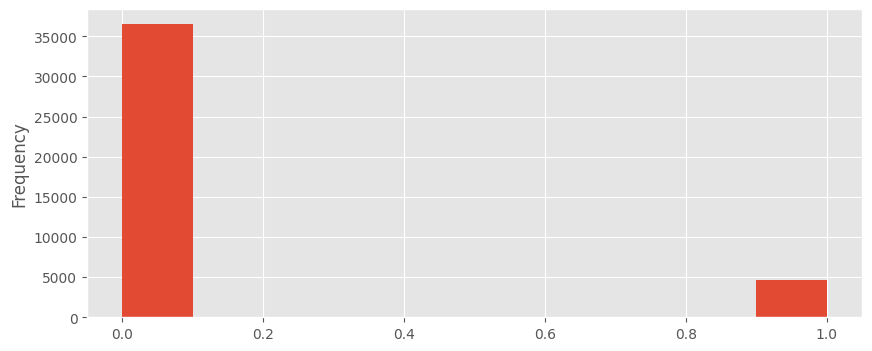

In [ ]:
# Generamos un histograma que representa la distribución de los datos contenidos en la columna 'y' de nuestro DataFrame (df_train).
# La altura de cada barra indica la frecuencia con la que aparecen los valores (en este caso 0 = no y 1 = yes).
df_train['y'].plot.hist(figsize=(10,4))

<Axes: ylabel='Density'>

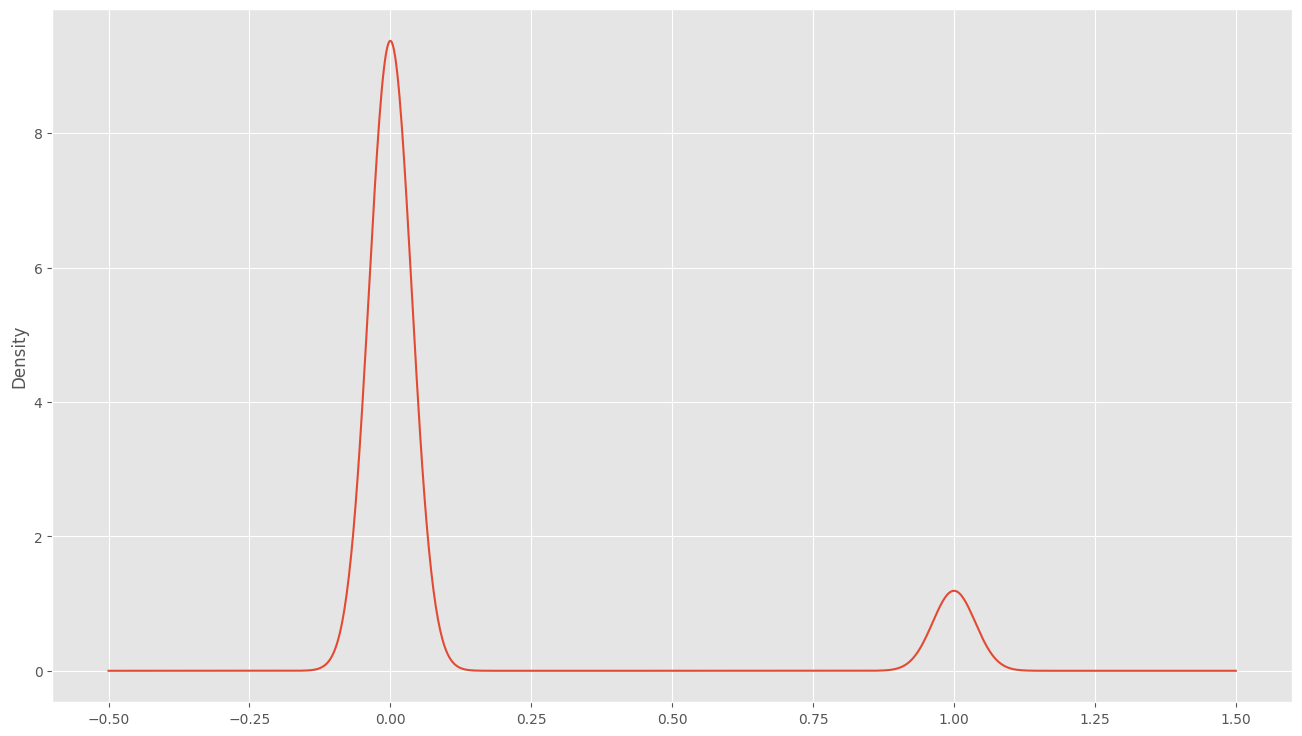

In [ ]:
df_train['y'].plot.density()

In [ ]:
# Calculamos la matriz de correlación entre todas las variables numéricas de nuestro conjunto de datos. Es una medida que indica el grado de relación entre dos columnas,
# con valores que varían entre -1 y 1. Añadimos el parámetro 'numeric_only' con valor True, ya que en este momento aún hay columnas con valores categóricos y habría conflictos.
df_train.corr(numeric_only = True)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


<Axes: >

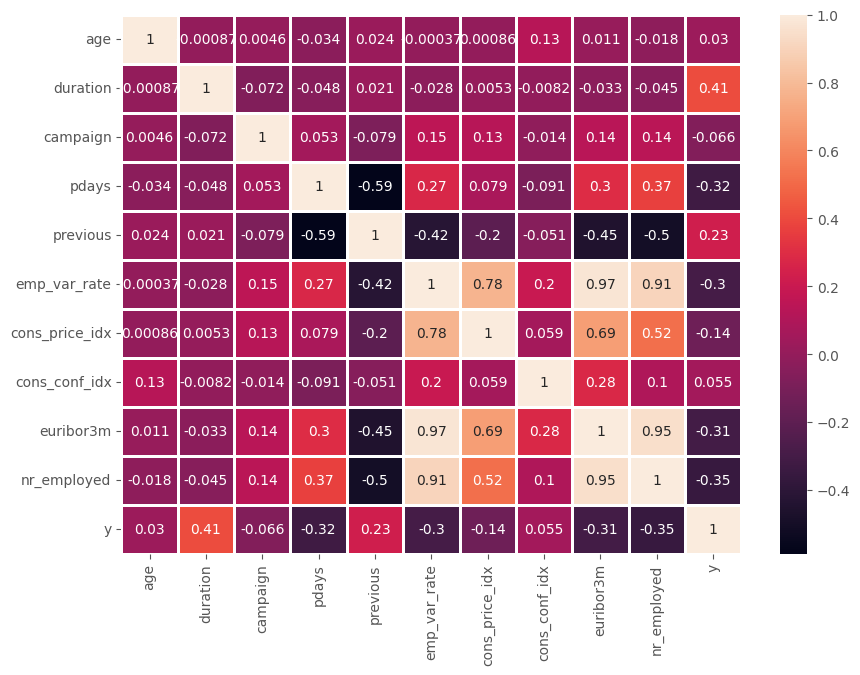

In [ ]:
# Traspasamos la información anterior a un gráfico para poder así visualizarlo mejor y que sea más intuitivo.
plt.figure(figsize=(10,7))
sb.heatmap(df_train.corr(numeric_only = True), annot=True, linewidths=2)

## 3. Preprocessing data


In [ ]:
# Comprobar si existen valores nulos o que faltan.
df_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [ ]:
# Borrar las columnas innecesarias:

# nr_employed: No consigo ver la posible relación que existe, la persona que acepta el crédito le da igual cúantos empleados tienen a la hora de tomar la decisión. Dato que borramos
# ya que no tenemos conocimiento acerca de la importancia de este dato a la hora de la predicción. En casos reales sería necesario preguntar la misma.

# month / day of week: Elimino estas columnas ya que creo que apartir de otra de las columnas que quedan (pdays:  número de días que han pasado desde que el cliente fue contactado por última vez),
# se puede sacar esa información tratando el valor de esa columna.

df_train = df_train.drop(['nr_employed', 'month', 'day_of_week'], axis = 1)

# Tratamos del mismo modo a los datos de los csv
df_test = df_test.drop(['nr_employed', 'month', 'day_of_week'], axis = 1)

df_train

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,0
1,53,technician,married,unknown,no,no,no,cellular,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,0
2,28,management,single,university.degree,no,yes,no,cellular,339,3,6,2,success,-1.7,94.055,-39.8,0.729,1
3,39,services,married,high.school,no,no,no,cellular,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,0
4,55,retired,married,basic.4y,no,yes,no,cellular,137,1,3,1,success,-2.9,92.201,-31.4,0.869,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,0
41186,48,technician,married,professional.course,no,no,yes,telephone,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,0


In [ ]:
# Tratamiento de las variables categóricas.
# Convertir las variables categóricas a numéricas.
class_label_encoder = LabelEncoder()

# Almacenamos las columnas categóricas para procesarlas en el siguiente bucle.
columnas_categoricas = ['job', 'marital', 'default', 'housing', 'poutcome', 'contact', 'education', 'loan']

for c in columnas_categoricas:
    df_train[c] = class_label_encoder.fit_transform(df_train[c])

    # Tranformamos también los datos de este df para poder usarlas más tarde
    df_test[c] = class_label_encoder.fit_transform(df_test[c])

# Los valores numéricos que salen en las columnas se relacionan directamente en orden con las posibles opciones de valores de cada columna,
# estos los podemos mirar en la documentación de arriba.
df_train

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,y
0,44,1,1,0,1,2,0,0,210,1,999,0,1,1.4,93.444,-36.1,4.963,0
1,53,9,1,7,0,0,0,0,138,1,999,0,1,-0.1,93.200,-42.0,4.021,0
2,28,4,2,6,0,2,0,0,339,3,6,2,2,-1.7,94.055,-39.8,0.729,1
3,39,7,1,3,0,0,0,0,185,2,999,0,1,-1.8,93.075,-47.1,1.405,0
4,55,5,1,0,0,2,0,0,137,1,3,1,2,-2.9,92.201,-31.4,0.869,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,5,1,3,1,0,2,1,222,1,999,0,1,1.4,94.465,-41.8,4.866,0
41184,31,3,1,0,1,0,0,1,196,2,999,0,1,1.1,93.994,-36.4,4.860,0
41185,42,0,2,6,1,2,2,1,62,3,999,0,1,1.1,93.994,-36.4,4.857,0
41186,48,9,1,5,0,0,2,1,200,2,999,0,1,-3.4,92.431,-26.9,0.742,0


## 4. Creación del modelo y división del dataset

### KNN

In [ ]:
# División del dataset. En la variable X guardamos todas las columnas (features) según las cuáles realizaremos la predicción. En cambio en y, guardamos la etiqueta resultado.
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, [-1]].values

# Le damos un tamaño a la parte de test de un 20% sobre el tamaño total del train, y establecemos una semilla para obtener la misma división cada vez que se ejecute.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

([<matplotlib.axis.XTick at 0x7f087ffca830>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

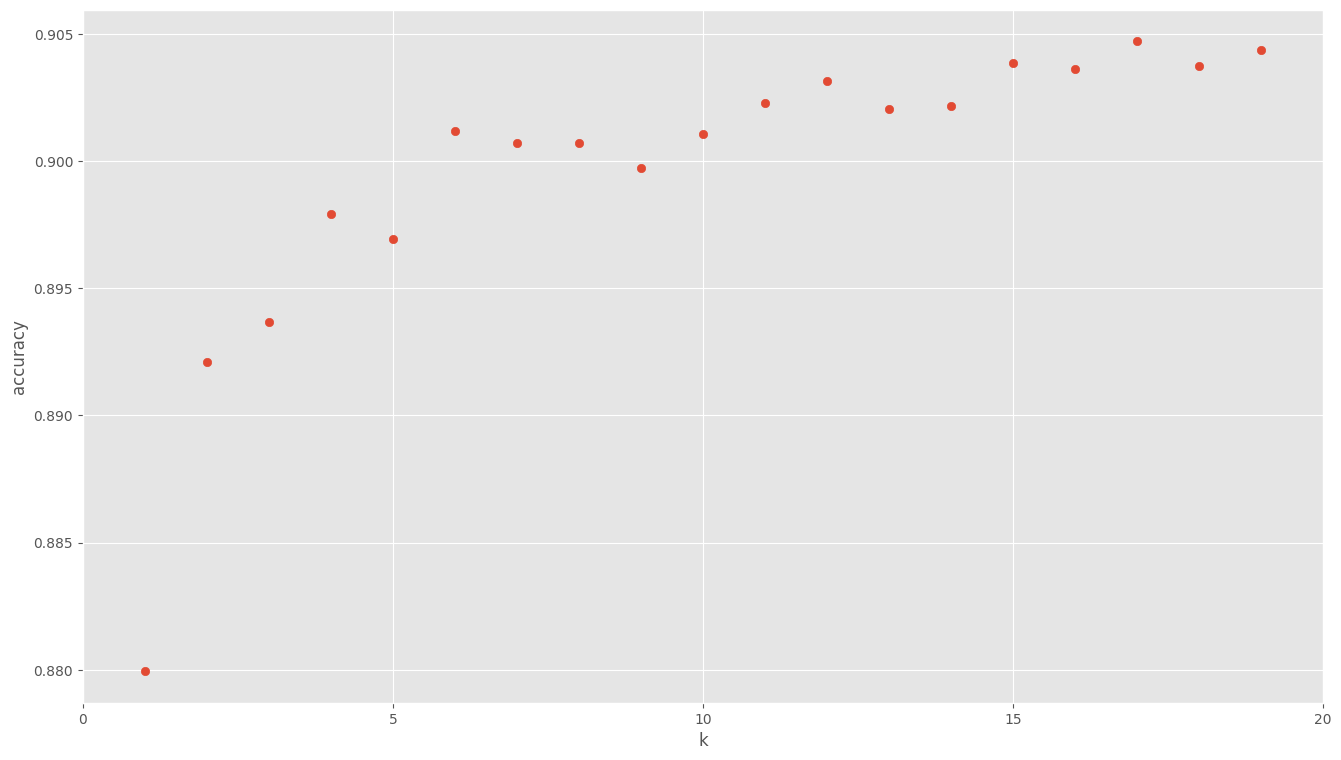

In [ ]:
# Cálculo de la mejor K

# Escogemos este rango ya que a la hora escoger uno mayor, aunque haya valores más altos, la mejoría no merece la pena en cuánto la relación tiempo/resultado.
k_range = range(1, 20)
scores = []

for k in k_range:
      knn = KNeighborsClassifier(n_neighbors = k)
      knn.fit(X_train, y_train)
      scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [ ]:
# Creación del modelo
n_neighbors = 17

knn = KNeighborsClassifier(n_neighbors)

### Regresión Lineal Múltiple

In [ ]:
# División del dataset. En la variable X_RLM guardamos todas las columnas (features) según las cuáles realizaremos la predicción. En cambio en y_RLM, guardamos la etiqueta resultado.
X_RLM = df_train.iloc[:, :-1].values
y_RLM = df_train.iloc[:, [-1]].values

# Lo mismo que en al algoritmo de KNN (tamaño parte test: 20%, semilla para obtener la misma división cada vez que se ejecute).
X_train_RLM, X_test_RLM, y_train_RLM, y_test_RLM = train_test_split(X_RLM, y_RLM, test_size = 0.2, random_state = 42)

In [ ]:
# Hacemos este paso para así poder mejorar el rendimiento del algoritmo garantizando que los datos estén todos en la misma escala.
scaler = StandardScaler()
X_train_RLM = scaler.fit_transform(X_train_RLM)
X_test_RLM = scaler.transform(X_test_RLM)
y_train_RLM = scaler.fit_transform(y_train_RLM)
y_test_RLM = scaler.transform(y_test_RLM)

In [ ]:
# Creación del modelo
lm = LinearRegression()

### Regresión Logística

In [ ]:
# División del dataset. En la variable X_RL guardamos todas las columnas (features) según las cuáles realizaremos la predicción. En cambio en y_RL, guardamos la etiqueta resultado.
X_RL = df_train.iloc[:, :-1].values
y_RL = df_train.iloc[:, [-1]].values

# Lo mismo que en el algoritmo de KNN y RLM(tamaño parte test: 20%, semilla para obtener la misma división cada vez que se ejecute).
X_train_RL, X_test_RL, y_train_RL, y_test_RL = train_test_split(X_RL, y_RL, test_size = 0.2, random_state = 42)

In [ ]:
# Creación del modelo
clf = LogisticRegression(random_state=42, penalty='l2', solver='lbfgs')

## 5. Entrenamiento

### KNN

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

### Regresión Lineal Múltiple

In [ ]:
lm.fit(X_train_RLM,y_train_RLM)

LinearRegression()

### Regresión Logística

In [ ]:
clf.fit(X_train_RL, y_train_RL)

LogisticRegression(random_state=42)

## 6. Análisis de resultados

### KNN

In [ ]:
# Imprimimos la precisión del algoritmo
print('Precisión del algoritmo KNN en el dataset de entrenamiento: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Precisión del algoritmo KNN en el dataset de test: {:.2f}'
      .format(knn.score(X_test, y_test)))

Precisión del algoritmo KNN en el dataset de entrenamiento: 0.91
Precisión del algoritmo KNN en el dataset de test: 0.90


In [ ]:
pred = knn.predict(X_test)

# Mostramos la matriz de confusión que compara las clases verdaderas con las predichas.
print(confusion_matrix(y_test, pred))


print('\n', classification_report(y_test, pred))

# Para la clase 0, la precisión es del 93%, lo que significa que el 93% de las instancias clasificadas como clase 0 son realmente clase 0. Para la clase 1, la precisión es del 64%,
# solo el 64% de las instancias clasificadas como clase 1 son realmente clase 1. En cuánto al recall (sensibilidad), tenemos un 97% (instancias de clase 0 que fueron
# clasificadas correctamente como clase 0) frente a un 39% (instancias de clase 1 que fueron clasificadas correctamente como clase 1). Como podemos ver, el fallo en cuánto a la predicción
# correcta de la clase 1 es mucho más alto que la de la clase 0, de ahí que la precisión general del modelo no sea superior al 90% (no es mal resultado, aunque es mejorable).

[[7084  211]
 [ 574  369]]

               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7295
           1       0.64      0.39      0.48       943

    accuracy                           0.90      8238
   macro avg       0.78      0.68      0.72      8238
weighted avg       0.89      0.90      0.89      8238



### Regresión Lineal Múltiple

In [ ]:
predictions = lm.predict(X_test_RLM)

mseLinear = mean_squared_error(y_test_RLM,predictions)
print('Error Cuadrático Medio (MSE) para el modelo de regresión linear = %.5f' % mseLinear)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test_RLM,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test_RLM,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test_RLM,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test_RLM,predictions),3))

Error Cuadrático Medio (MSE) para el modelo de regresión linear = 0.68524
Mean absolute error (MAE): 0.4961647913228288
Mean square error (MSE): 0.6852377282734302
Root mean square error (RMSE): 0.8277908723061823
R-squared value of predictions: 0.327


In [ ]:
# Imprimimos la precisión del algoritmo
print('Precisión del algoritmo RLM en el dataset de entrenamiento: {:.2f}'
      .format(lm.score(X_train_RLM, y_train_RLM)))
print('Precisión del algoritmo RLM en el dataset de test: {:.2f}'
      .format(lm.score(X_test_RLM, y_test_RLM)))

Precisión del algoritmo RLM en el dataset de entrenamiento: 0.34
Precisión del algoritmo RLM en el dataset de test: 0.33


In [ ]:
# Indica el valor esperado de la variable dependiente (y) cuando todos los valores de las características son cero.
print("Valor de intercepción del modelo: ", lm.intercept_)

Valor de intercepción del modelo:  [2.37062041e-12]


In [ ]:
# Valores de importancia de las características a la hora de los cambios del resultado.
print("Valores de importancia del modelo:", lm.coef_)

Valores de importancia del modelo: [[ 0.01443471  0.0061573   0.01188483  0.02845465 -0.02392258  0.00250849
  -0.00590978 -0.15431413  0.38567939  0.01097068 -0.12823524  0.00564119
   0.07919199 -0.4672061   0.30597556  0.13912692  0.00305328]]


### Regresión Logística

In [ ]:
# Umbral para la decisión
prob_th = 0.5
prob_df=pd.DataFrame(clf.predict_proba(X_test_RL[:20]),columns=['Probabilidad de NO','Probabilidad de SI'])
prob_df['Decision']=(prob_df['Probabilidad de SI']>prob_th).apply(int)
prob_df

,Probabilidad de NO,Probabilidad de SI,Decision
0,0.971180,0.028820,0
1,0.953386,0.046614,0
2,0.528829,0.471171,0
3,0.981895,0.018105,0
4,0.980975,0.019025,0
5,0.924954,0.075046,0
6,0.970659,0.029341,0
7,0.927462,0.072538,0
8,0.989873,0.010127,0
9,0.813324,0.186676,0


In [ ]:
# Imprimimos la precisión del algoritmo
print('Precisión del algoritmo RL en el dataset de entrenamiento: {:.2f}'
      .format(clf.score(X_train_RL, y_train_RL)))
print('Precisión del algoritmo RL en el dataset de test: {:.2f}'
      .format(clf.score(X_test_RL, y_test_RL)))

Precisión del algoritmo RL en el dataset de entrenamiento: 0.91
Precisión del algoritmo RL en el dataset de test: 0.90


In [ ]:
# Mostramos la matriz de confusión que compara las clases verdaderas con las predichas.
print(confusion_matrix(y_test_RL, clf.predict(X_test_RL)))

[[7070  225]
 [ 560  383]]


In [ ]:
print(classification_report(y_test_RL, clf.predict(X_test_RL)))

# En este caso del modelo de Regresión Logística para la clase 0 la precisión es del 93% (igual que en el KNN). Sin embargo para la clase 1, la precisión es del 63%
# (un punto menos que en el KNN). En cuánto al recall (sensibilidad), tenemos un 97% (instancias de clase 0 que fueron
# clasificadas correctamente como clase 0) frente a un 41% (instancias de clase 1 que fueron clasificadas correctamente como clase 1). En este caso, el valor de acierto en los valores de la clase 1
# supera a los del KNN. Como podemos ver, el fallo en cuánto a la predicción correcta de la clase 1 sigue siendo mucho más alto que la de la clase 0,
# de ahí que la precisión general del modelo tampoco sea superior al 90% (no es mal resultado, aunque es mejorable).

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7295
           1       0.63      0.41      0.49       943

    accuracy                           0.90      8238
   macro avg       0.78      0.69      0.72      8238
weighted avg       0.89      0.90      0.90      8238



## 7. Realización de predicciones

### KNN

In [ ]:
# Columnas necesarias para realizar las predicciones
columnas_necesarias = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                       'contact', 'duration', 'campaign', 'pdays',
                       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
                       'cons_conf_idx', 'euribor3m']

# Creamos una lista vacía para almacenar las predicciones
predicciones = []

for indice, fila in df_test.iterrows():
    # Seleccionamos los datos necesarios para hacer la predicción
    datos_prediccion = fila[columnas_necesarias].values.reshape(1, -1)

    # Predecimos y almacenamos el resultado
    prediccion = knn.predict(datos_prediccion)
    predicciones.append(prediccion[0])

df_test['prediccion'] = predicciones

df_test

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,prediccion
0,30,1,1,2,0,2,0,0,487,2,999,0,1,-1.8,92.893,-46.2,1.313,0
1,39,7,2,3,0,0,0,1,346,4,999,0,1,1.1,93.994,-36.4,4.855,0
2,25,7,1,3,0,2,0,1,227,1,999,0,1,1.4,94.465,-41.8,4.962,0
3,38,7,1,2,0,1,1,1,17,3,999,0,1,1.4,94.465,-41.8,4.959,0
4,47,0,1,6,0,2,0,0,58,1,999,0,1,-0.1,93.200,-42.0,4.191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,53,1,999,0,1,1.4,93.918,-42.7,4.958,0
4115,39,0,1,3,0,2,0,1,219,1,999,0,1,1.4,93.918,-42.7,4.959,0
4116,27,8,2,3,0,0,0,0,64,2,999,1,0,-1.8,92.893,-46.2,1.354,0
4117,58,0,1,3,0,0,0,0,528,1,999,0,1,1.4,93.444,-36.1,4.966,0


### Regresión Lineal Múltiple

Tuve que hacer las predicciones en el apartado de arriba y saltarme el orden ya que las necesitaba para hacer el cálculo de los errores y así poder realizar el análisis de datos

### Regresión Logística

Como en el algoritmo de Regresión Lineal Múltiple me vuelve a pasar lo mismo, por lo que me obliga a realizar las predicciones en el apartado anterior.

## 8. Visualización

### KNN

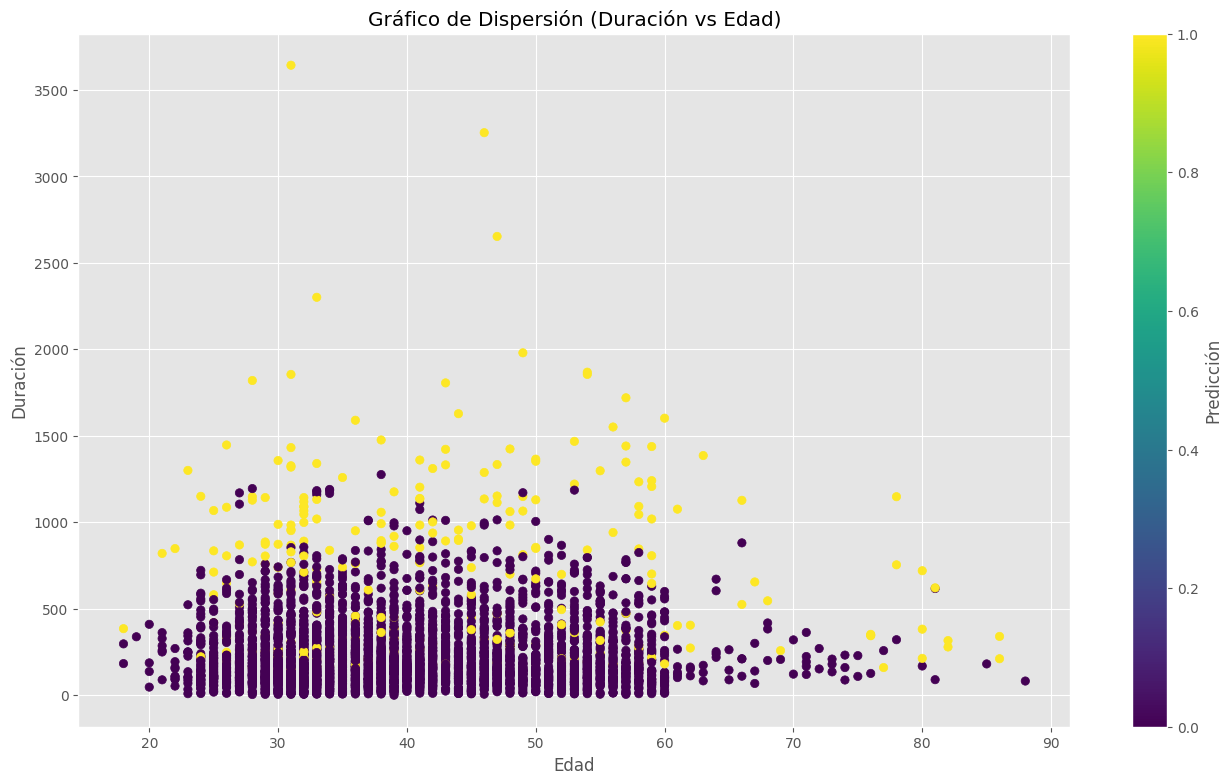

In [ ]:
# Decidí seleccionar la edad y la duración para mostrar como influyen en la toma de la decisión ya que considero que son características bastante relevantes. La edad puede
# dar información sobre la disponibilidad del cliente a la hora de aceptar o no, ya que cúanto más joven (ya siendo adulto) se necesita y se gasta una cantidad mayor de dinero
# que siendo menor de edad o ya una persona anciana. En cúanto a la duración de la llamada, cúanto más larga sea la llamada podemos asociar que el cliente le está interesando
# la oferta o que por lo menos se está pensando si aceptar o no, de lo contrario ya colgaría y la duración sería mínima.

# Vemos que entre el rango de edad de los 30 a los 50 y cuánto mayor sea la duración de la llamada aparecen un mayor número de puntos amarillos y más altos, lo que se
# corresponde con una mayor probabilidad de 1 (aceptar el crédito).

plt.scatter(df_test['age'], df_test['duration'], c=df_test['prediccion'])
plt.xlabel('Edad')
plt.ylabel('Duración')
plt.title('Gráfico de Dispersión (Duración vs Edad)')
plt.colorbar(label='Predicción')
plt.show()

### Regresión Lineal Múltiple

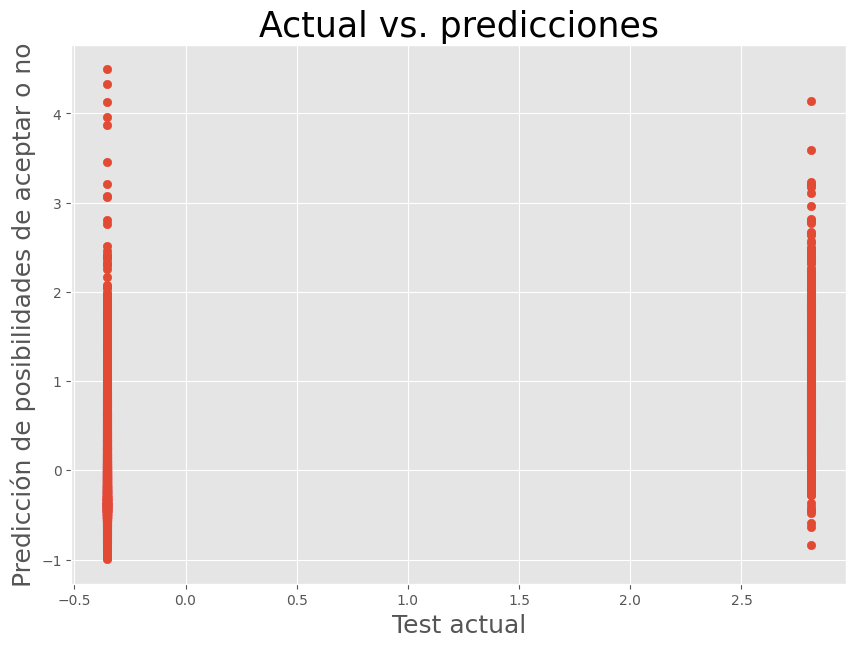

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicciones",fontsize=25)
plt.xlabel("Test actual",fontsize=18)
plt.ylabel("Predicción de posibilidades de aceptar o no", fontsize=18)
plt.scatter(x=y_test_RLM,y=predictions)

### Regresión Logística

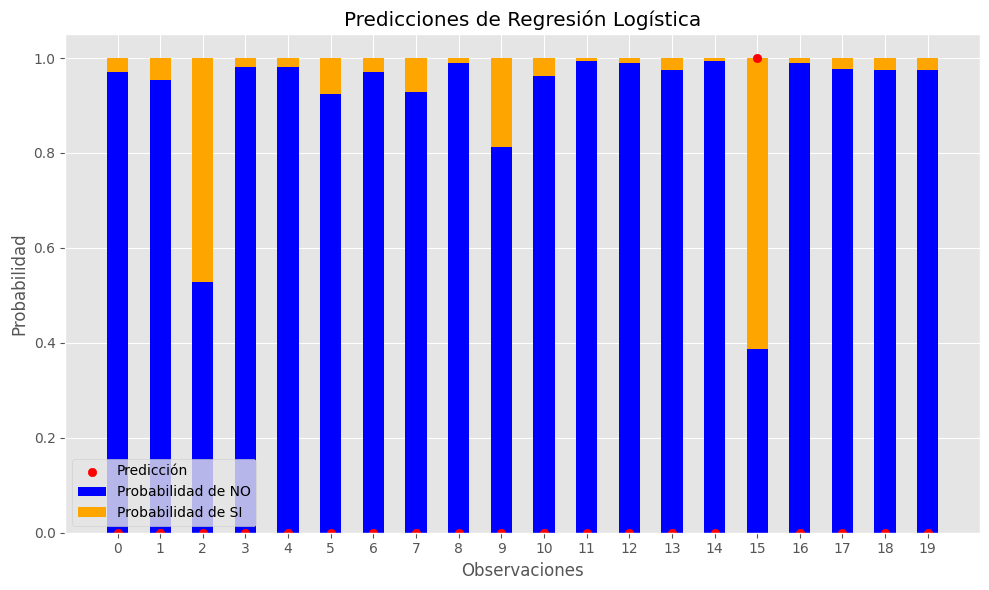

In [ ]:
probabilidades = prob_df[['Probabilidad de NO', 'Probabilidad de SI']].values
decisiones = prob_df['Decision'].values

indices = np.arange(len(probabilidades))

# Creamos el gráfico de barras apiladas de las 20 primeras predicciones y sus porcentajes entre el Si y el No
plt.figure(figsize=(10, 6))
plt.bar(indices, probabilidades[:, 0], 0.5, label='Probabilidad de NO', color='blue')
plt.bar(indices, probabilidades[:, 1], 0.5, bottom=probabilidades[:, 0], label='Probabilidad de SI', color='orange')
plt.scatter(indices, decisiones, color='red', label='Predicción')

# Ajustamos el formato del gráfico
plt.xlabel('Observaciones')
plt.ylabel('Probabilidad')
plt.title('Predicciones de Regresión Logística')
plt.xticks(indices, indices)
plt.legend()

# Mostramos el gráfico
plt.tight_layout()
plt.show()

## **Conclusión final**

Despúes de haber pasado por todas las fases necesarias para el funcionamiento de cada uno de los algorimtos y revisando los ***scores*** de todos ellos había algo que me sorprendía que era el bajo valor que tenía el algoritmo de ***Regresión Lineal***. Despúes de buscar información y preguntar por estos valores tan extraños, llegue a la conclusión de que este problema en concreto de predeccir si una persona aceptaría o no un crédito (respuesta binaria), no era un problema que se pudiese resolver de una manera acertada ni óptima con un algoritmo de regresión como lo es la ***Regresión Lineal***, sino que era un claro ejemplo de problema para resolver con algorimtos de clasificación debido a los valores de su **target ('y')**. Por ello, la conclusión va a estar más centrada en buscar cuál de los otros dos algoritmos es más conveniente de usar después de explicar la razón de porqué aparto la ***Regresión Lineal***. Como pudimos ver en el apartado *'Análisis de resultados'*, los valores del score en el ***KNN*** y en la ***Regresión Logística*** son muy parejos. Aún así, entre eses dos escogería la Regresión Logística para resolver otro problema similar a este. Las razones son la siguientes:


*   En cuánto a las predicciones, la Regresión Logística aporta los porcentajes de cada respuesta posible y puedes entender porque escogió esa. Minetras que en el KNN solo te muestra la predicción sin especificarte en que datos se basó para llegar a eso.
*   **Es más eficiente computacionalmente**, ya que no debe calcular la distancia entre la instancia de prueba y todas las instancias de entrenamiento (cálculo de la mejor K), como si lo tiene que hacer el KNN.
* **Es menos sensible a la escala de las características**. Aunque ninguno de los dos es muy sensible, la Regresión Logísitica tolera valores de diferentes escalas mejor que el KNN.
* **Es más eficiente en términos de almacenamiento y tiempo de cálculo**.

En resumen, si se está trabajando con un problema de clasificación con un conjunto de datos pequeño o moderado (como es el caso), la Regresión Logística puede ser una de las mejores opciones. Sin embargo, si no importa tanto la interpretación del modelo y se trabaja con un problema de clasificación con un conjunto de datos grande, KNN sería la alternativa viable (teniendo en cuenta su alta complejidad computacional).

